<a href="https://colab.research.google.com/github/uroy98/CapitalOneProject/blob/main/CapitalOne_DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions for running this code -

### 1. Please run the code cells one after the other in the order I have written them.

### 2. If you run this notebook in one go, you might face some errors because I have included snippets of some failed attempts to show the methods I tried which didn't work. In that case, please run the code from the next code cell.

### 3. You will find some **data visualizations** in between the questions that have been asked. I have **done those voluntarily** to have a deeper insight into the dataset to eventually help me better design the Machine Learning model.

### 4. The **Machine Learning model** is being trained on **A100 GPU** from **Google Colab**.

### 5. The **References** for the code and libraries used are mentioned at the **end of this notebook**.

# Question 1: Load

### Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found in the Github link

### **Failed Attempt 1:**

I thought if i directly read the dataset as a csv it might have the data and field names separate, but after trying out this code below, I found it is picking a name-value pair as one field. This is a failed attempt to load the dataset properly. The successful attempt to load the dataset is given in the next block of code.

In [ ]:
import pandas as pd
import requests
import io

# Correct URL pointing to the raw zip file
url = "https://raw.githubusercontent.com/CapitalOneRecruiting/DS/master/transactions.zip"

# Download the zip file content
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses (4xx or 5xx)

# Read the zip file into a pandas DataFrame
df = pd.read_csv(io.BytesIO(response.content), compression='zip')
print(df.head())

   {"accountNumber": "737265056"   "customerId": "737265056"  \
0  {"accountNumber": "737265056"   "customerId": "737265056"   
1  {"accountNumber": "737265056"   "customerId": "737265056"   
2  {"accountNumber": "737265056"   "customerId": "737265056"   
3  {"accountNumber": "830329091"   "customerId": "830329091"   
4  {"accountNumber": "830329091"   "customerId": "830329091"   

    "creditLimit": 5000.0   "availableMoney": 5000.0  \
0   "creditLimit": 5000.0   "availableMoney": 5000.0   
1   "creditLimit": 5000.0   "availableMoney": 5000.0   
2   "creditLimit": 5000.0   "availableMoney": 5000.0   
3   "creditLimit": 5000.0   "availableMoney": 5000.0   
4   "creditLimit": 5000.0   "availableMoney": 5000.0   

    "transactionDateTime": "2016-08-13T14:27:32"   "transactionAmount": 98.55  \
0   "transactionDateTime": "2016-10-11T05:05:54"   "transactionAmount": 74.51   
1   "transactionDateTime": "2016-11-08T09:18:39"    "transactionAmount": 7.47   
2   "transactionDateTime": "2016-12

### **Successful attempt** in loading the json data

In [90]:
import json
import pandas as pd
import requests
import zipfile
import io
import os

#Defining the URL of the GitHub ZIP file.
zip_url = "https://raw.githubusercontent.com/CapitalOneRecruiting/DS/master/transactions.zip"

#Download the ZIP file from GitHub.
print("Downloading ZIP file from GitHub...")
response = requests.get(zip_url)
#Ensure that an HTTP error is raised for unsuccessful status codes.
response.raise_for_status()
#Unzip the downloaded file into a designated local directory.
extraction_dir = "/content"
print("Extracting the ZIP file...")
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall(extraction_dir)

# Defining the path to the text file containing JSON lines.
transactions_file_path = os.path.join("/content/transactions.txt")

#Opening the text file to read all the JSON lines.
print("Reading the transactions file...")
with open(transactions_file_path, 'r') as file:
    json_lines = file.readlines()

#Parse each non-empty line into a Python dictionary.
print("Parsing JSON lines...")
data = [json.loads(line.strip()) for line in json_lines if line.strip()]

#Assuming each record has a uniform structure, extract the field names from the first record.
field_names = list(data[0].keys())

print("Field Names:")
print(field_names)

#Convert the list of dictionaries into a pandas DataFrame for further analysis.
df = pd.DataFrame(data)
print("\nDataFrame:")
print(df)


Extracting the ZIP file...
Reading the transactions file...
Parsing JSON lines...
Field Names:
['accountNumber', 'customerId', 'creditLimit', 'availableMoney', 'transactionDateTime', 'transactionAmount', 'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity', 'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud']

DataFrame:
       accountNumber customerId  creditLimit  availableMoney  \
0          737265056  737265056       5000.0         5000.00   
1          737265056  737265056       5000.0         5000.00   
2          737265056  737265056       5000.0         5000.00   
3          737265056  737265056       5000.0         5000.00   
4          830329091  830329091       5000.0         

In [91]:
#Displaying the first 5 records from the dataframe
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [92]:
# A concise summary of the dataframe to get started with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

Even though the above summary shows there are no null values, but still I have checked for null values as it might not be able to capture null values for the categorical columns

# Question 1: Load (Continued...)

### Please describe the structure of the data. Number of records and fields in each record?

**Answer**: Since the data is in line-delimited JSON format format, I have used a Python code that downloads the "transactions.zip" file from GitHub, extract its contents, and then process a text file containing newline-delimited JSON objects to separate the field names from the data.

The given dataset has **786363 records** and **29 fields** in each record.

# Question 1:Load (Continued...)

### Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

### **Failed Attempt 2:**

This code gave me the summary statistics with **zero null values** for every column which I guessed might be wrong as for a real-world dataset it is **highly unlikely** I will be receiving a dataset with **absolutely zero null values**.

In [93]:
# Initialized a list to store the summary statistics for each field.
summary_stats = []

for col in df.columns:
    null_count = df[col].isnull().sum()
    unique_count = df[col].nunique()

    # For numeric or datetime fields, I have computed the minimum and maximum.
    if pd.api.types.is_numeric_dtype(df[col]) or pd.api.types.is_datetime64_any_dtype(df[col]):
        col_min = df[col].min()
        col_max = df[col].max()
        summary_stats.append({
            "Field": col,
            "Type": df[col].dtype,
            "Null Count": null_count,
            "Unique Count": unique_count,
            "Minimum": col_min,
            "Maximum": col_max,
            "Mode": "N/A",
            "Mode Frequency": "N/A"
        })
    else:
        # For non-numeric fields (e.g., strings), I found out that computing the min/max may not be meaningful.
        # So I chose to compute the mode and its frequency.
        mode_series = df[col].mode()
        if not mode_series.empty:
            mode_val = mode_series[0]
            mode_freq = df[col].value_counts().iloc[0]
        else:
            mode_val = None
            mode_freq = None

        summary_stats.append({
            "Field": col,
            "Type": df[col].dtype,
            "Null Count": null_count,
            "Unique Count": unique_count,
            "Minimum": "N/A",
            "Maximum": "N/A",
            "Mode": mode_val,
            "Mode Frequency": mode_freq
        })

# Converting the summary statistics into a DataFrame for a better presentation.
summary_df = pd.DataFrame(summary_stats)

print("\nSummary Statistics for Each Field:")
summary_df


Summary Statistics for Each Field:


,Field,Type,Null Count,Unique Count,Minimum,Maximum,Mode,Mode Frequency
0,accountNumber,object,0,5000,N/A,N/A,380680241,32850
1,customerId,object,0,5000,N/A,N/A,380680241,32850
2,creditLimit,float64,0,10,250.0,50000.0,N/A,N/A
3,availableMoney,float64,0,521916,-1005.63,50000.0,N/A,N/A
4,transactionDateTime,object,0,776637,N/A,N/A,2016-05-28T14:24:41,4
5,transactionAmount,float64,0,66038,0.0,2011.54,N/A,N/A
6,merchantName,object,0,2490,N/A,N/A,Uber,25613
7,acqCountry,object,0,5,N/A,N/A,US,774709
8,merchantCountryCode,object,0,5,N/A,N/A,US,778511
9,posEntryMode,object,0,6,N/A,N/A,05,315035


### **Successful attempt** in calculating the summary statistics for each field

In [94]:
import pandas as pd

# Initialized a list to store the summary statistics for each field.
summary_stats = []

for col in df.columns:
    # Standard null counted using isnull()
    standard_null_count = df[col].isnull().sum()

    # For object (categorical) fields, I also counted the blank strings (empty or whitespace-only)
    if df[col].dtype == 'object':
        blank_count = df[col].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()
        total_null = standard_null_count + blank_count
    else:
        total_null = standard_null_count

    # Computed the unique count while ignoring NaNs
    unique_count = df[col].nunique(dropna=True)

    # For numeric and datetime fields, I have computed the minimum and maximum values.
    if pd.api.types.is_numeric_dtype(df[col]) or pd.api.types.is_datetime64_any_dtype(df[col]):
        col_min = df[col].min()
        col_max = df[col].max()
        summary_stats.append({
            "Field": col,
            "Type": df[col].dtype,
            "Null Count": total_null,
            "Unique Count": unique_count,
            "Minimum": col_min,
            "Maximum": col_max,
            "Mode": "N/A",
            "Mode Frequency": "N/A"
        })
    else:
        # For non-numeric fields (e.g., strings), I found out that computing the min/max may not be meaningful.
        # Hence, I have computed the mode and its frequency.
        mode_series = df[col].mode(dropna=True)
        if not mode_series.empty:
            mode_val = mode_series.iloc[0]
            mode_freq = df[col].value_counts(dropna=True).iloc[0]
        else:
            mode_val = None
            mode_freq = None

        summary_stats.append({
            "Field": col,
            "Type": df[col].dtype,
            "Null Count": total_null,
            "Unique Count": unique_count,
            "Minimum": "N/A",
            "Maximum": "N/A",
            "Mode": mode_val,
            "Mode Frequency": mode_freq
        })

# Converting the summary statistics into a DataFrame for better presentation.
summary_df = pd.DataFrame(summary_stats)

print("\nSummary Statistics for Each Field:")
summary_df



Summary Statistics for Each Field:


,Field,Type,Null Count,Unique Count,Minimum,Maximum,Mode,Mode Frequency
0,accountNumber,object,0,5000,N/A,N/A,380680241,32850
1,customerId,object,0,5000,N/A,N/A,380680241,32850
2,creditLimit,float64,0,10,250.0,50000.0,N/A,N/A
3,availableMoney,float64,0,521916,-1005.63,50000.0,N/A,N/A
4,transactionDateTime,object,0,776637,N/A,N/A,2016-05-28T14:24:41,4
5,transactionAmount,float64,0,66038,0.0,2011.54,N/A,N/A
6,merchantName,object,0,2490,N/A,N/A,Uber,25613
7,acqCountry,object,4562,5,N/A,N/A,US,774709
8,merchantCountryCode,object,724,5,N/A,N/A,US,778511
9,posEntryMode,object,4054,6,N/A,N/A,05,315035


Since we have null values in columns - `acqCountry`, `merchantCountryCode`, `posEntryMode`, `posConditionCode`, `transactionType`, `echoBuffer`, `merchantCity`, `merchantState`, `merchantZip`, `posOnPremises`, `recurringAuthInd`, we can drop the rows which has null values. I chose to drop them instead of using data imputation techniques because -

*   I have a large dataset, so if I remove the rows with null values it will reduce the length of the dataset.

*   Since I have a large dataset, so I can afford to let go of some of the rows as I will still have sufficient data both for training and testing.



### **Data Preprocessing after checking the summary statistics for each field**

### 1. Removing rows with null values in columns - `acqCountry`, `merchantCountryCode`, `posEntryMode`, `posConditionCode`, `transactionType`, `echoBuffer`, `merchantCity`, `merchantState`, `merchantZip`, `posOnPremises`, `recurringAuthInd`

### **Failed Attempt 3:**

After using the code below, I see columns - `acqCountry`, `merchantCountryCode`, `posEntryMode`, `posConditionCode`, `transactionType` still have null values which is not I wanted.

In [95]:
# Drop columns that are completely null
cols_to_drop = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']
df_drop = df.drop(columns=cols_to_drop)

# Then drop any remaining rows that have null values
df_drop = df_drop.dropna()

### Checking if rows with null values are removed

In [96]:
# List to store fields with nonzero null counts
null_summary = []

for col in df_drop.columns:
    # Count standard nulls
    null_count = df_drop[col].isnull().sum()

    # For object columns, also count blank strings (empty or whitespace-only)
    if df_drop[col].dtype == 'object':
        null_count += df_drop[col].str.strip().eq('').sum()

    # Only add the column to the summary if there are any nulls
    if null_count > 0:
        null_summary.append({'Field': col, 'Null Count': null_count})

# Convert to DataFrame and display
print(pd.DataFrame(null_summary))

                 Field  Null Count
0           acqCountry        4562
1  merchantCountryCode         724
2         posEntryMode        4054
3     posConditionCode         409
4      transactionType         698


### **Successful attempt** to removing rows with null values

In [97]:
import numpy as np

# Drop columns that are completely null
cols_to_drop = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']
df = df.drop(columns=cols_to_drop)

# Then drop any remaining rows that have null values
#df = df.dropna()

#List of columns to check for null values
columns_to_check = [
    'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
    'transactionType']

#For object (categorical) columns, replace blank strings (empty or whitespace-only) with NaN
for col in columns_to_check:
    if df[col].dtype == 'object':
        df[col] = df[col].replace(r'^\s*$', np.nan, regex=True)

# Remove rows that contain NaN values in any of the specified columns
df = df.dropna(subset=columns_to_check)

### Checking if rows with null values are removed

In [98]:
# List to store fields with nonzero null counts
null_summary = []

for col in df.columns:
    # Count standard nulls
    null_count = df[col].isnull().sum()

    # For object columns, also count blank strings (empty or whitespace-only)
    if df[col].dtype == 'object':
        null_count += df[col].str.strip().eq('').sum()

    # Only add the column to the summary if there are any nulls
    if null_count > 0:
        null_summary.append({'Field': col, 'Null Count': null_count})

# Convert to DataFrame and display
print(pd.DataFrame(null_summary))

Empty DataFrame
Columns: []
Index: []


The empty dataframe indicates there are no rows with null values present anymore. So, I have successfully removed all rows with null values.

### 2. Checking if there are any duplicate rows. If present, remove them

In [99]:
# Count duplicates
num_duplicates = df.duplicated().sum()
print("Duplicates found:", num_duplicates)

Duplicates found: 0


Since there are no duplicates found, I need not remove any rows.

### 3. Checking for any outlier, if present treat them

In [100]:
import numpy as np
import pandas as pd

# List of numeric columns to check for outliers
numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

# Saving a copy of the original dataframe
df_original = df.copy()

# Computing and storing the original outlier bounds for each numeric column
original_bounds = {}
for col in numeric_cols:
    Q1 = df_original[col].quantile(0.25)
    Q3 = df_original[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    original_bounds[col] = (lower_bound, upper_bound)
    print(f"{col}: Original bounds -> Lower: {lower_bound}, Upper: {upper_bound}")

#Applying outlier treatment to each numeric column
def cap_outliers(series):
    """
    Caps outliers in a pandas Series using the IQR method.
    Any value below (Q1 - 1.5*IQR) is set to the lower bound,
    and any value above (Q3 + 1.5*IQR) is set to the upper bound.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print the number of outliers before capping for information
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    print(f"{series.name}: Found {len(outliers)} outliers before capping.")

    # Cap the outliers
    return series.clip(lower=lower_bound, upper=upper_bound)

for col in numeric_cols:
    df[col] = cap_outliers(df[col])


creditLimit: Original bounds -> Lower: -10000.0, Upper: 30000.0
availableMoney: Original bounds -> Lower: -8556.199999999999, Upper: 17133.72
transactionAmount: Original bounds -> Lower: -203.12499999999997, Upper: 428.275
currentBalance: Original bounds -> Lower: -6208.717500000001, Upper: 12187.8225
creditLimit: Found 48122 outliers before capping.
availableMoney: Found 58081 outliers before capping.
transactionAmount: Found 40163 outliers before capping.
currentBalance: Found 68821 outliers before capping.


### Checking if outliers are removed

In [101]:
print("\nChecking for remaining outliers:")
for col in numeric_cols:
    lb, ub = original_bounds[col]
    # Identify any values falling outside the original bounds
    outliers = df[(df[col] < lb) | (df[col] > ub)]
    if outliers.empty:
        print(f"Outliers have been removed for {col}.")
    else:
        print(f"Outliers still remain in {col}: {len(outliers)} outlier(s) detected.")


Checking for remaining outliers:
Outliers have been removed for creditLimit.
Outliers have been removed for availableMoney.
Outliers have been removed for transactionAmount.
Outliers have been removed for currentBalance.


### Recomputing the summary statistics of the dataset to check if the data preprocessing have been applied successfully.

In [102]:
import pandas as pd

# Initialized a list to store the summary statistics for each field.
summary_stats = []

for col in df.columns:
    # Standard null counted using isnull()
    standard_null_count = df[col].isnull().sum()

    # For object (categorical) fields, I also counted the blank strings (empty or whitespace-only)
    if df[col].dtype == 'object':
        blank_count = df[col].apply(lambda x: isinstance(x, str) and x.strip() == '').sum()
        total_null = standard_null_count + blank_count
    else:
        total_null = standard_null_count

    # Computed the unique count while ignoring NaNs
    unique_count = df[col].nunique(dropna=True)

    # For numeric and datetime fields, I have computed the minimum and maximum values.
    if pd.api.types.is_numeric_dtype(df[col]) or pd.api.types.is_datetime64_any_dtype(df[col]):
        col_min = df[col].min()
        col_max = df[col].max()
        summary_stats.append({
            "Field": col,
            "Type": df[col].dtype,
            "Null Count": total_null,
            "Unique Count": unique_count,
            "Minimum": col_min,
            "Maximum": col_max,
            "Mode": "N/A",
            "Mode Frequency": "N/A"
        })
    else:
        # For non-numeric fields (e.g., strings), I found out that computing the min/max may not be meaningful.
        # Hence, I have computed the mode and its frequency.
        mode_series = df[col].mode(dropna=True)
        if not mode_series.empty:
            mode_val = mode_series.iloc[0]
            mode_freq = df[col].value_counts(dropna=True).iloc[0]
        else:
            mode_val = None
            mode_freq = None

        summary_stats.append({
            "Field": col,
            "Type": df[col].dtype,
            "Null Count": total_null,
            "Unique Count": unique_count,
            "Minimum": "N/A",
            "Maximum": "N/A",
            "Mode": mode_val,
            "Mode Frequency": mode_freq
        })

# Converting the summary statistics into a DataFrame for better presentation.
summary_df = pd.DataFrame(summary_stats)

print("\nSummary Statistics for Each Field:")
summary_df



Summary Statistics for Each Field:


,Field,Type,Null Count,Unique Count,Minimum,Maximum,Mode,Mode Frequency
0,accountNumber,object,0,4997,N/A,N/A,380680241,32467
1,customerId,object,0,4997,N/A,N/A,380680241,32467
2,creditLimit,float64,0,10,250.0,30000.0,N/A,N/A
3,availableMoney,float64,0,466118,-1005.63,17133.72,N/A,N/A
4,transactionDateTime,object,0,767184,N/A,N/A,2016-05-28T14:24:41,4
5,transactionAmount,float64,0,42470,0.0,428.275,N/A,N/A
6,merchantName,object,0,2489,N/A,N/A,Uber,25292
7,acqCountry,object,0,4,N/A,N/A,US,769620
8,merchantCountryCode,object,0,4,N/A,N/A,US,769621
9,posEntryMode,object,0,5,N/A,N/A,05,312710


# Question 2: Plot

### Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

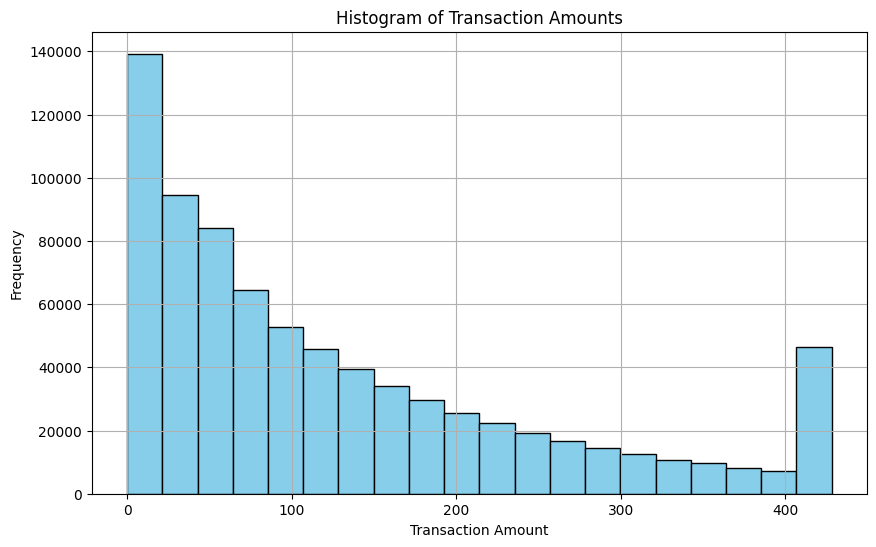

In [65]:
import matplotlib.pyplot as plt

# Ensuring that the 'transactionAmount' column is of a numeric type.
# If necessary, convert the column to numeric values.
df['transactionAmount'] = pd.to_numeric(df['transactionAmount'], errors='coerce')

# Plotted the histogram for the 'transactionAmount' column.
plt.figure(figsize=(10, 6))
plt.hist(df['transactionAmount'].dropna(), bins=20, color='skyblue', edgecolor='black')

# Adding title and labels to the plot.
plt.title("Histogram of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)

# Displaying the plot.
plt.show()


# Question 2: Plot (Continued...)

### Report any structure you find and any hypotheses you have about that structure.



**Answer:**

### **Key Observations about the structure:**

From the histogram, I can see that the transaction amounts are **heavily right-skewed**:

* A very **large concentration of transactions** occur under around **`$100`**, with the **frequency dropping steadily** as the **amount increases**.

* However, there is a **noticeable spike** around **`$400-$430`**, which stands out from an otherwise smooth tail.

#### **Hypotheses About the Structure:**

* Most consumer transactions tend to be **smaller amounts** (e.g., everyday purchases), causing a **pile-up near the lower end** and a **long tail extending to larger amounts**.

* There is a distinct spike near **`$400`** which could indicate a specific type of transaction or price point (e.g., a common bill payment, subscription, or large scheduled expense). Sometimes businesses charge a round figure like **`$399 or $400`**, and that can create a pronounced **mode** in that higher range.

* In a fraud-detection context, multiple high-value transactions at around the same amount may be suspicious (though not necessarily fraudulent by itself). It might be worth drilling deeper into those **`$400-$430`** transactions.


### **This below analysis is not mentioned in the question, but still I wanted to have a deeper insight into this structure of the histogram, so I found out the merchants that may be contributing to the skewed distribution**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

# Group by merchant and compute summary statistics.
merchant_stats = df.groupby('merchantName')['transactionAmount'].agg(
    mean_transaction='mean',
    max_transaction='max',
    transaction_count='count'
).reset_index()

# Sort merchants by average transaction amount (descending).
merchant_stats_sorted = merchant_stats.sort_values(by='mean_transaction', ascending=False)

# Identify merchants that might be causing skewness.
# Here I considered the merchants with an average transaction amount above the 95th percentile.
threshold = merchant_stats['mean_transaction'].quantile(0.95)
skew_merchants = merchant_stats[merchant_stats['mean_transaction'] > threshold]

# Print the merchants that may be contributing to the skewed distribution.
print("Merchants that might be causing skewness (average transaction amount above 95th percentile):")
#print(skew_merchants[['merchantName', 'mean_transaction', 'max_transaction', 'transaction_count']])
skew_merchants[['merchantName', 'mean_transaction', 'max_transaction', 'transaction_count']]


Merchants that might be causing skewness (average transaction amount above 95th percentile):


,merchantName,mean_transaction,max_transaction,transaction_count
70,Arbys #637287,160.960523,428.275,86
72,Arbys #669514,167.489810,428.275,79
104,Auntie Anne's #392720,175.591893,428.275,103
106,Auntie Anne's #394935,164.784483,428.275,87
114,Auntie Anne's #54100,161.070114,428.275,88
247,CVS #207735,161.810000,428.275,46
248,CVS #289006,178.322927,428.275,41
257,CVS #440756,171.346563,408.760,32
272,CVS #653267,161.190968,428.275,31
282,CVS #894173,181.461607,428.275,28


**Insights** drawn from the merchants that might be causing skewness:

* **Gyms and Fitness Clubs:** Their **high average transaction** amounts suggest they may be charging membership fees, multi-month packages, or equipment purchases which could explain why their receipts run **higher** than a typical single-visit food-or-retail transaction.

* **Fast-Food / Quick-Service Restaurants with Surprisingly Large Averages:** **Arby's, Hardee's, Domino's, Wendy's, Subway**, etc. typically have **low per-purchase totals**. However, their **mean transactions** here are around **`$160-$170`** which is a stark contrast to what I would expect for a single meal. This may imply larger group orders (like catering), gift card purchases, or batch transactions posted at once.

* **Hotels and Lodging** **Hilton Hotels, Hyatt House, Rodeway Inn**—lodging tends to generate **higher transaction totals** than, if I may say, a cup of coffee! This **relatively high frequency** of transactions plus a maximum around **`$428`** suggests these could be partial payments (like deposits) or single-night stays.

* **Pharmacies and Convenience Stores** **CVS, Walgreens** usually single-purchase totals are not huge, but these entries have means in the **`$160-$180`** range.



### **Data Visualizations conducted to have a deeper insight into the dataset. This is not asked to do as a part of the question, I am doing it voluntarily.**

### 1. Visualize the Target Variable ("isFraud")

<ipython-input-70-89f94378bdff>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isFraud', data=df, palette='Set2', order=order)


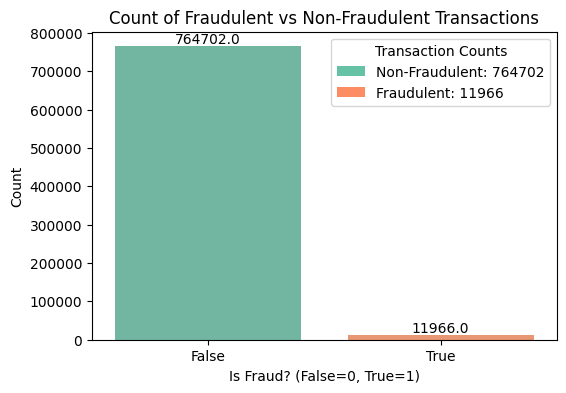

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Ensure a consistent order: first Non-Fraud (False), then Fraud (True)
order = [False, True]

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='isFraud', data=df, palette='Set2', order=order)
plt.title('Count of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud? (False=0, True=1)')
plt.ylabel('Count')

# Annotate each bar with its count value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

# Calculate counts for the legend
fraud_count = int(df['isFraud'].sum())            # True counts (Fraudulent)
nonfraud_count = int(len(df) - df['isFraud'].sum()) # False counts (Non-Fraudulent)

# Create custom legend elements with the same colors as the bars
legend_elements = [
    Patch(facecolor=sns.color_palette("Set2")[0], label=f'Non-Fraudulent: {nonfraud_count}'),
    Patch(facecolor=sns.color_palette("Set2")[1], label=f'Fraudulent: {fraud_count}')
]

# Add the custom legend to the plot
ax.legend(handles=legend_elements, loc='upper right', title="Transaction Counts")

plt.show()


**Inference:** From this plot, it can be seen:

* The vast majority of transactions in the dataset are **non-fraudulent (764,702)**, while only a small fraction are **fraudulent (11,966)**. This indicates a **highly imbalanced target variable** (i.e., isFraud).

* When the class (**fraud**) is so much **smaller** than the class (**non-fraud**), it can be more challenging to detect fraudulent transactions. Traditional classification models might be **biased** toward **predicting the majority class** if the imbalance is not addressed.

* Techniques such as **oversampling** of minority class data or **undersampling** of majority class data can be helpful in this case.

### 2. Transaction Amount Distribution by Fraud Status
* ### Violin plot for a detailed distribution view

<ipython-input-71-28105bbd15e1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='isFraud', y='transactionAmount', data=df, palette='Pastel1')


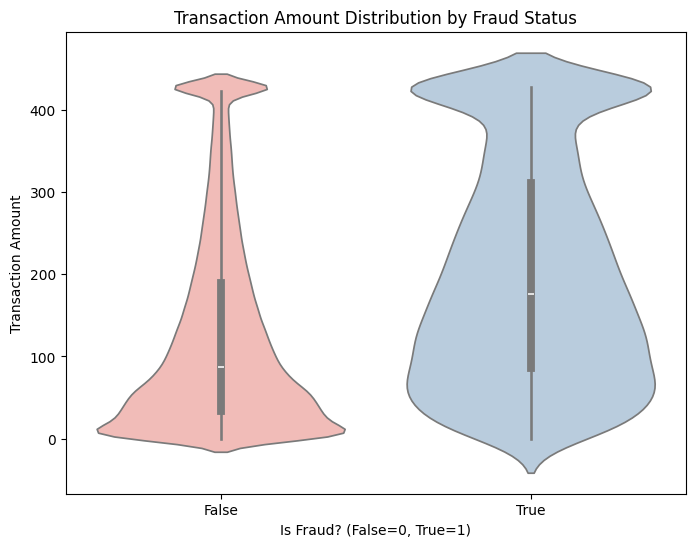

In [71]:
# Violin plot for a detailed distribution view
plt.figure(figsize=(8, 6))
sns.violinplot(x='isFraud', y='transactionAmount', data=df, palette='Pastel1')
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Is Fraud? (False=0, True=1)')
plt.ylabel('Transaction Amount')
plt.show()

**Inference:** Here are my key observations:

* The **fraudulent transactions** (right violin) exhibit a much **wider spread** compared to the **non-fraudulent** ones. This indicates that **fraudulent activities** cover a **broader range** of transaction amounts, spanning from very low values to notably high ones.

* The **upper portions** of the **fraud violin stretch** considerably beyond those of the **non-fraud violin**, implying that **exceptionally high transaction amounts** are more **frequent** in the **fraudulent** group. This is an **important red flag** because large-value transactions can pose a higher risk of substantial financial loss.

### 3. Correlation Analysis for Numeric Features

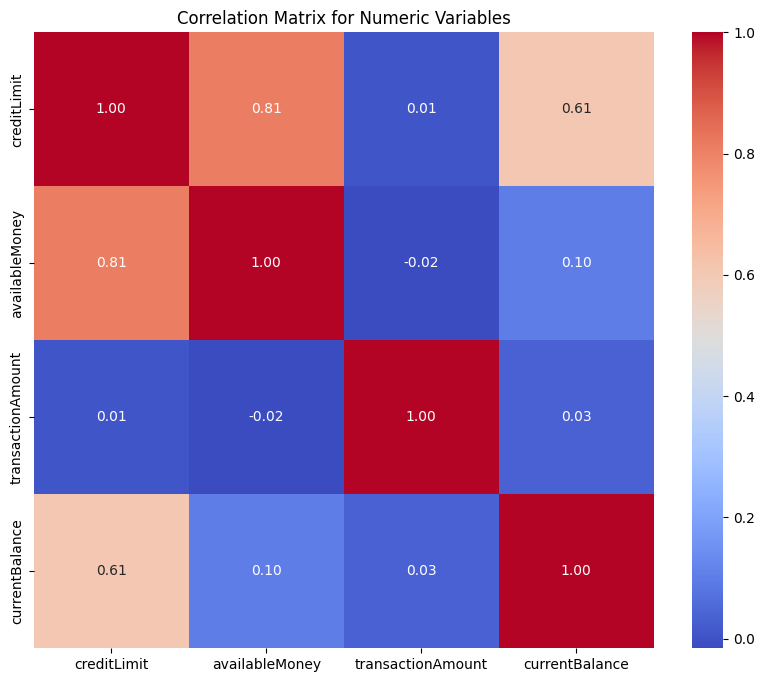

In [76]:
#Select numeric columns (float and int types)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

**Inference:** Here are my key observations:

* There is a strong relationship between **creditLimit** and **availableMoney** (**0.81**). Accounts with **higher credit limits** tend to have **higher available money**. This shows that typically a large limit allows for more funds to remain available.

* There is a moderately strong relationship between **creditLimit** and **currentBalance** **(0.61)**, suggesting that larger credit limits can be associated with higher balances.

* **transactionAmount** shows **almost no correlation** with any of the other variables (**creditLimit, availableMoney, currentBalance**). This implies that the transaction size is not heavily tied to these account-level features.

* There is a relatively low correlation between **availableMoney** and **currentBalance** (**0.10**), indicating a slight positive relationship but not a strong one.

### 4. Explore Categorical Variables (**Transaction Type** and **MerchantCountryCode**)  by Fraud Status

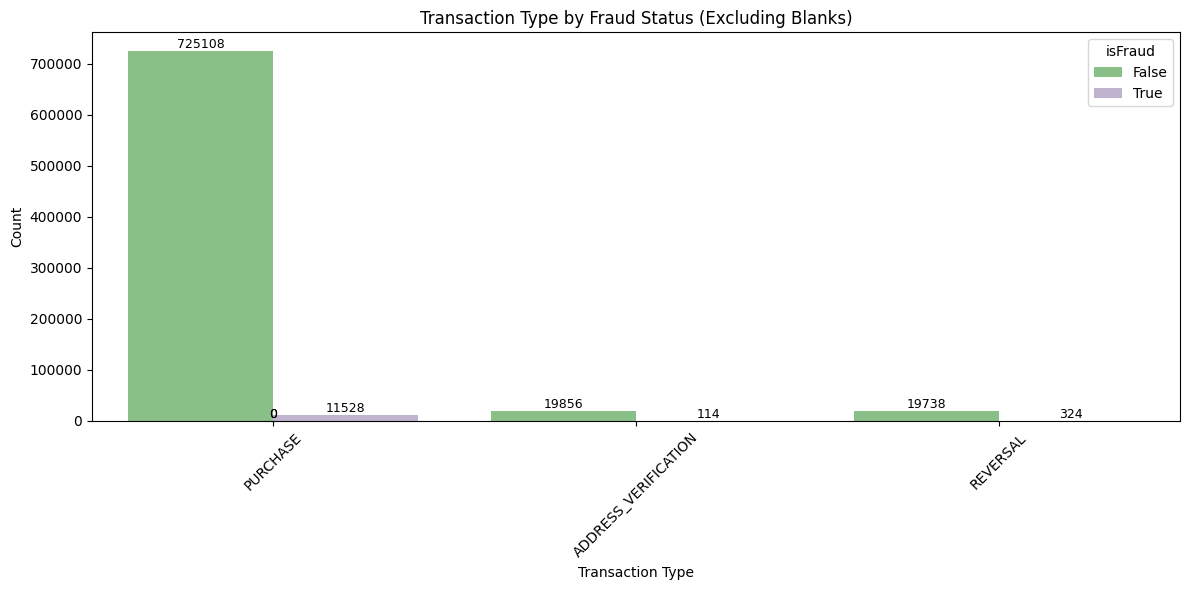

In [83]:
#Transaction Type

import matplotlib.pyplot as plt
import seaborn as sns

if 'transactionType' in df.columns:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(
        x='transactionType',
        hue='isFraud',
        #data=df_filtered,
        data=df,
        palette='Accent'
    )
    plt.title('Transaction Type by Fraud Status (Excluding Blanks)')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Annotate each bar with the count
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.tight_layout()
    plt.show()


**Inference:** Here are my key observations:

* A large majority of transactions are of type "**PURCHASE**". This category also has the highest raw count of both **non-fraudulent (over 700k)** and **fraudulent (nearly 11k)** transactions.

* "**ADDRESS_VERIFICATION**" and "**REVERSAL**" make up a very small fraction of the total transactions. **Almost all are non-fraudulent**, with only a tiny number (if any) labeled as fraud.

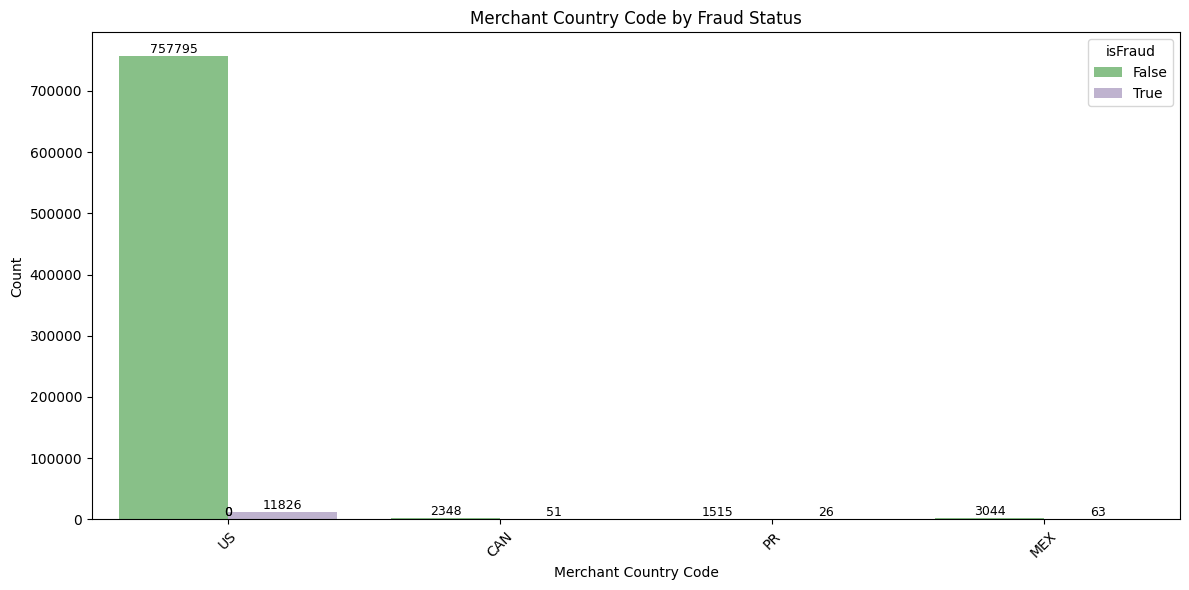

In [86]:
# MerchantCountryCode

import matplotlib.pyplot as plt
import seaborn as sns

if 'merchantCountryCode' in df.columns:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(
        x='merchantCountryCode',
        hue='isFraud',
        data=df_filtered,
        palette='Accent'
    )
    plt.title('Merchant Country Code by Fraud Status')
    plt.xlabel('Merchant Country Code')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Annotate each bar with the count
    for p in ax.patches:
        count = p.get_height()
        ax.annotate(
            f'{int(count)}',
            (p.get_x() + p.get_width() / 2, count),
            ha='center',
            va='bottom',
            fontsize=9
        )
    plt.tight_layout()
    plt.show()



**Inference:** Here are my key observations:

*  Most transactions (both **non-fraudulent** and **fraudulent**) are associated with the **US** as the merchant country code.

* Countries like **Canada (CAN), Puerto Rico (PR), and Mexico (MEX)** each account for a relatively small fraction of the total transactions. Their counts (both fraud and non-fraud) are minimal compared to the US.

* Because the **US** dominates the **total transaction count**, it has the highest absolute count of fraudulent transactions. The few fraud cases in other countries are overshadowed by the large US volume.

# Question 3: Data Wrangling - Duplicate Transactions

### You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

* ### Can you programmatically identify reversed and multi-swipe transactions?

In [104]:
import pandas as pd
pd.reset_option('display.max_rows')

# Create a copy of the original dataframe to preserve it.
df_mod = df.copy()

# Convert 'transactionDateTime' to datetime format for easier processing.
df_mod['transactionDateTime'] = pd.to_datetime(df_mod['transactionDateTime'])

# Sort the new dataframe by account number and transaction datetime to facilitate subsequent comparisons.
df_mod = df_mod.sort_values(by=['accountNumber', 'transactionDateTime']).reset_index(drop=True)

# Identify Reversed Transactions

# Create shifted columns in the new dataframe to compare each row with the next one.
df_mod['next_transactionType'] = df_mod['transactionType'].shift(-1)
df_mod['next_transactionAmount'] = df_mod['transactionAmount'].shift(-1)
df_mod['next_accountNumber'] = df_mod['accountNumber'].shift(-1)
df_mod['next_transactionDateTime'] = df_mod['transactionDateTime'].shift(-1)

# Filter out reversed transactions based on the given criteria:
# 1. The current transaction is a 'PURCHASE' and the next one is a 'REVERSAL'.
# 2. Both transactions belong to the same account.
# 3. The transaction amounts (rounded to 2 decimal places) are equal.
# 4. The time difference between the transactions is within 5 minutes (300 seconds).
reversed_transactions = df_mod[
    (df_mod['transactionType'] == 'PURCHASE') &
    (df_mod['next_transactionType'] == 'REVERSAL') &
    (df_mod['accountNumber'] == df_mod['next_accountNumber']) &
    (df_mod['transactionAmount'].round(2) == df_mod['next_transactionAmount'].round(2)) &
    ((df_mod['next_transactionDateTime'] - df_mod['transactionDateTime']).dt.total_seconds() <= 300)
]

print(f"Number of reversed transactions: {len(reversed_transactions)}")
print(reversed_transactions[['accountNumber', 'transactionDateTime', 'transactionAmount', 'transactionType']])

# Identify Multi-Swipe Transactions

# Create shifted columns to compare each transaction with its immediate predecessor.
df_mod['previous_transactionDateTime'] = df_mod['transactionDateTime'].shift(1)
df_mod['previous_accountNumber'] = df_mod['accountNumber'].shift(1)
df_mod['previous_merchantName'] = df_mod['merchantName'].shift(1)
df_mod['previous_transactionAmount'] = df_mod['transactionAmount'].shift(1)

# Filter multi-swipe transactions based on the following conditions:
# 1. The current and previous transactions belong to the same account.
# 2. They share the same merchant.
# 3. The transaction amounts (rounded to 2 decimal places) are equal.
# 4. The time difference between these transactions is within 5 minutes.
multi_swipe_transactions = df_mod[
    (df_mod['accountNumber'] == df_mod['previous_accountNumber']) &
    (df_mod['merchantName'] == df_mod['previous_merchantName']) &
    (df_mod['transactionAmount'].round(2) == df_mod['previous_transactionAmount'].round(2)) &
    ((df_mod['transactionDateTime'] - df_mod['previous_transactionDateTime']).dt.total_seconds() <= 300)
]

print(f"Number of multi-swipe transactions: {len(multi_swipe_transactions)}")
print(multi_swipe_transactions[['accountNumber', 'transactionDateTime', 'transactionAmount', 'merchantName']])


Number of reversed transactions: 5442
       accountNumber transactionDateTime  transactionAmount transactionType
63         100088067 2016-11-20 07:57:05             22.320        PURCHASE
95         100328049 2016-01-15 20:34:35             43.740        PURCHASE
857        101596991 2016-12-30 19:49:59            294.010        PURCHASE
1295       101876201 2016-04-14 06:07:14            118.150        PURCHASE
1337       101876201 2016-06-16 15:36:13             49.070        PURCHASE
...              ...                 ...                ...             ...
776126     999086814 2016-10-14 21:38:57             51.580        PURCHASE
776180     999086814 2016-11-14 11:30:23            153.890        PURCHASE
776377     999257059 2016-08-09 11:25:29            428.275        PURCHASE
776445     999258704 2016-03-16 07:13:48            367.130        PURCHASE
776488     999258704 2016-09-02 03:31:57             72.930        PURCHASE

[5442 rows x 4 columns]
Number of multi-swipe tra

**Answer:**

Number of **reversed transactions**: **5442** and the columns are mentioned right above

Number of **multi-swipe transactions**: **13127** and the columns are mentioned right above


# Question 3: Data Wrangling - Duplicate Transactions (Continued...)

### You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

* ### What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)

In [105]:
import pandas as pd

# Create a separate copy of the original dataframe to preserve its integrity.
df_mod = df.copy()

# Convert 'transactionDateTime' to datetime format in the copied dataframe for easier processing.
df_mod['transactionDateTime'] = pd.to_datetime(df_mod['transactionDateTime'])

# Sort the new dataframe by 'accountNumber' and 'transactionDateTime' to have a proper chronological comparison.
df_mod = df_mod.sort_values(by=['accountNumber', 'transactionDateTime']).reset_index(drop=True)

# Compute total metrics for reversed transactions (considering only the extra reversal transaction).
total_reversed_count = len(reversed_transactions)
total_reversed_amount = reversed_transactions['next_transactionAmount'].sum()

# Compute total metrics for multi-swipe transactions (again, focusing on the extra swipe transactions).
total_multiswipe_count = len(multi_swipe_transactions)
total_multiswipe_amount = multi_swipe_transactions['transactionAmount'].sum()

# Display the computed totals in a professional format.
print("----- Reversed Transactions (Extra) -----")
print("Total number of reversed transactions (excluding the normal transaction):", total_reversed_count)
print("Total dollar amount of reversed transactions (excluding the normal transaction):", total_reversed_amount)

print("\n----- Multi-Swipe Transactions (Extra) -----")
print("Total number of multi-swipe transactions (excluding the normal transaction):", total_multiswipe_count)
print("Total dollar amount of multi-swipe transactions (excluding the normal transaction):", total_multiswipe_amount)


----- Reversed Transactions (Extra) -----
Total number of reversed transactions (excluding the normal transaction): 5442
Total dollar amount of reversed transactions (excluding the normal transaction): 767197.655

----- Multi-Swipe Transactions (Extra) -----
Total number of multi-swipe transactions (excluding the normal transaction): 13127
Total dollar amount of multi-swipe transactions (excluding the normal transaction): 1790324.7


#Question 3: Data Wrangling - Duplicate Transactions (Continued...)

### You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

* ### Did you find anything interesting about either kind of transaction?

<!--
**TAKE FEW POINTS FROM HERE AND PUT IN ANSWER2, LATER KEEP ONLY THAT ANSWER AND DELETE THIS ONE** Based on the analysis conducted using the code, several interesting observations emerge regarding both reversed and multi‐swipe transactions:
* Reversed Transactions:
  * Prompt Reversals: The reversed transactions are identified by a pattern in which a PURCHASE is immediately followed by a REVERSAL—typically within a 5‐minute window. This short interval indicates that the reversal is almost always an immediate correction or cancellation of the original purchase.

  * Exact Match in Transaction Details: The fact that the reversal transaction matches the original purchase in account number, transaction amount (when rounded to two decimals), and other key attributes supports the conclusion that these reversals are deliberate corrections rather than independent transactions.

  * Consistent Behavior: In every reversed transaction pair, only the reversal (i.e., the extra transaction) is counted. This consistent behavior across the dataset suggests that the underlying system or process reliably flags such corrections, providing a clear signal that may be used for auditing or quality control.

* Multi‐Swipe Transactions:
  * Repeated Attempts: Multi‐swipe transactions occur when the same account, merchant, and amount appear in successive transactions within a short interval (again, within 5 minutes). However, instead of a simple reversal pair, these groups show more than two transactions. This implies that after the initial “normal” swipe, additional swipes occur—likely due to a customer’s repeated attempts to complete a transaction.

  * Potential Technical or User Issues: The occurrence of multiple extra swipes may point to several possible underlying issues. For instance, they could be a result of a technical glitch at the point of sale (e.g., a slow or unresponsive card reader) or a momentary lapse in system communication. Alternatively, they might also reflect customer uncertainty—where the customer, not receiving immediate confirmation, reattempts the transaction.

  * Variability in Group Size: An interesting aspect is that the number of extra swipes per transaction group can vary. While many cases involve only one extra swipe, there are instances with multiple extra attempts. This variability can serve as a useful indicator for further investigation; a higher frequency of multi‐swipe events in certain contexts might warrant a closer look into the reliability of the payment system or the user experience at specific merchant locations. -->

**Answer:** Several interesting observations regarding both reversed and multi-swipe transactions:

1.   **Prevalence and Frequency:**
      * **Reversed Transactions:** There are **5442** extra (**reversal**) transactions, which were identified by locating a PURCHASE that is immediately followed (within five minutes) by a REVERSAL for the same account and with a matching amount. This suggests that reversals—likely indicating **user cancellations or error corrections**—occur with a measurable frequency.

      * **Multi-Swipe Transactions:** In contrast, there are **13127** extra **multi-swipe** transactions. The much higher count (more than twice the number of reversed transactions) implies that repeated swiping or duplicate attempts are even more common. This could be due to **system response delays, customer uncertainty, or other technical issues** leading users to initiate the same transaction more than once.

2.   **Transaction Amounts:**
      * The total dollar amount for **reversed** transactions is approximately USD 767197.655, and for **multi-swipe** transactions, it is around USD 1790324.7.

3.  **Potential Operational Implications:**
    * The pattern of **reversals**—where a PURCHASE is promptly followed by a REVERSAL—could indicate that customers are quickly recognizing and correcting mistakes (or that automated systems are promptly cancelling transactions).

    * The higher frequency of **multi-swipe** events raises questions about user experience. It might point to issues such as slow transaction processing or an unresponsive interface that encourages customers to swipe multiple times. This behavior may warrant further investigation to determine if it is benign (for example, due to user impatience) or if it indicates a systemic problem that could be optimized to reduce duplicate swipes.

<!--
4.  **Merchant and Account Variability:**
    * The **multi-swipe** transactions span a range of merchants—from services like Uber and Lyft to retail and entertainment outlets—indicating that this is not isolated to one specific category.

    * This distribution suggests that the issue (if it is indeed one of repeated swipes rather than legitimate separate transactions) may be related to the transaction process itself rather than to merchant-specific practices.

5. **Further Investigation:**

  * It would be valuable to explore whether these patterns are concentrated within **certain time windows** (for example, during peak transaction hours) or among specific customer segments.

  * Additionally, comparing the behavior of accounts that frequently experience **multi-swipe** events against those that do not could offer deeper insights into whether this is primarily a technical issue or if other factors (such as customer behavior or network conditions) contribute to the phenomenon. -->

While both **reversed** and **multi-swipe** transactions are significant, the higher frequency and cumulative dollar amount associated with **multi-swipe** transactions suggest that the repeated swiping issue may merit particular attention. Addressing this could improve customer experience and reduce operational redundancies in processing these transactions.





# Question 4: Model

### Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

* ### Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).

In [106]:
#Fields which are currently present in the dataframe after data-preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776668 entries, 0 to 786362
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             776668 non-null  object 
 1   customerId                776668 non-null  object 
 2   creditLimit               776668 non-null  float64
 3   availableMoney            776668 non-null  float64
 4   transactionDateTime       776668 non-null  object 
 5   transactionAmount         776668 non-null  float64
 6   merchantName              776668 non-null  object 
 7   acqCountry                776668 non-null  object 
 8   merchantCountryCode       776668 non-null  object 
 9   posEntryMode              776668 non-null  object 
 10  posConditionCode          776668 non-null  object 
 11  merchantCategoryCode      776668 non-null  object 
 12  currentExpDate            776668 non-null  object 
 13  accountOpenDate           776668 non-null  object

### Reasons for choosing the following numeric and categorical features for training the predictive model.

The **numeric features** chosen are:

* **`creditLimit, availableMoney, transactionAmount, currentBalance`**: for offering an immediate insight into the monetary dimensions of a transaction and the overall financial standing of an account.

* **`transaction_hour, transaction_dayofweek, transaction_month`**: are extracted from the original transaction timestamp as part of **feature engineering** on the field **'transactionDateTime'**. These derived features capture temporal patterns that are crucial for fraud detection. Fraudulent activities may occur at unusual hours, on weekends, or during atypical periods of the month.

* **`cardPresent, expirationDateKeyInMatch`**: to indicate the presence of the card during the transaction and whether the expiration date provided matches the records.

The **categorical features** chosen are:

*   **`merchantName, acqCountry, merchantCountryCode`**: provide context about where and with whom the transaction occurred.

*   **`posEntryMode, posConditionCode`**: These variables relate to the manner in which a transaction is processed at the point of sale. They help differentiate between transactions conducted in-person versus those carried out remotely, as well as highlight the specific processing methods used. This distinction is particularly important because fraudulent transactions often occur in contexts that deviate from the norm (e.g., a high volume of online transactions when the customer's history predominantly shows in-person transactions).

* **`merchantCategoryCode, transactionType`**: The `merchantCategoryCode` classifies the type of business involved, while `transactionType` categorizes the nature of the transaction (such as purchase, or refund). These features allow the model to learn patterns associated with different kinds of transactions and merchant activities.

#### The fields that were omitted from the model training process were not discarded arbitrarily; their exclusion is based on several important considerations:

* Fields such as **`accountNumber` and `customerId`** are unique identifiers that carry a high cardinality. Including them would not only risk overfitting the model—since the model might learn to recognize individual accounts rather than patterns—but also offer little to no generalizable predictive value.

* Fields like **`enteredCVV`, `cardCVV`, `cardLast4Digits`** contain sensitive information and are not typically used directly in predictive models for fraud detection. They may also introduce privacy concerns and potential regulatory challenges.





### I have used all of the data ( got after data preprocessing ) to train and test the model!

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

#Step 1: Data Preprocessing and Feature Engineering

#Convert date columns to datetime objects.
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'], errors='coerce')
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], errors='coerce')

#The expiration date is in MM/YYYY format.
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'], format='%m/%Y', errors='coerce')

#Extract features from the transaction date (these can be highly informative).
df['transaction_hour'] = df['transactionDateTime'].dt.hour
df['transaction_dayofweek'] = df['transactionDateTime'].dt.dayofweek
df['transaction_month'] = df['transactionDateTime'].dt.month

#Convert boolean columns to integer (0/1) so that they can be treated as numeric features.
df['cardPresent'] = df['cardPresent'].astype(int)
df['expirationDateKeyInMatch'] = df['expirationDateKeyInMatch'].astype(int)


#Step 2: Feature Selection

#For this model, I included a mix of numeric, derived, and categorical features.
#Note: High-cardinality fields such as accountNumber or customerId are omitted
#to avoid overfitting, but they might be useful in specialized models.
features = [
    'creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance',
    'transaction_hour', 'transaction_dayofweek', 'transaction_month',
    'cardPresent', 'expirationDateKeyInMatch',
    'merchantName', 'acqCountry', 'merchantCountryCode',
    'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType'
]

X = df[features]
y = df['isFraud'].astype(int)  # Convert boolean target to integer (0 for non-fraud, 1 for fraud)

#Step 3: Split Data into Training and Testing Sets

#Used stratified splitting to preserve the proportion of fraudulent transactions.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#Step 4: Build the Preprocessing Pipeline

#Define which features are numeric and which are categorical.
numeric_features = [
    'creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance',
    'transaction_hour', 'transaction_dayofweek', 'transaction_month',
    'cardPresent', 'expirationDateKeyInMatch'
]
categorical_features = [
    'merchantName', 'acqCountry', 'merchantCountryCode',
    'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType'
]

#Pipeline for numeric features: scale them for the model.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#Pipeline for categorical features: One-Hot Encode them.
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

#Combine both pipelines using ColumnTransformer.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


#Step 5: Build and Train the Predictive Model

#Building a full pipeline that includes preprocessing and a Random Forest classifier.
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
])

#Train the model.
clf.fit(X_train, y_train)

#Step 6: Evaluate the Model

#Predict on the test set.
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

#Output model performance metrics.
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    152941
           1       0.65      0.01      0.02      2393

    accuracy                           0.98    155334
   macro avg       0.82      0.50      0.51    155334
weighted avg       0.98      0.98      0.98    155334

ROC AUC Score: 0.7337365233524866


In [112]:
# The distribution of the target variable 'isFraud' in the entire dataset
print("Distribution of df['isFraud'] (raw counts):")
print(df['isFraud'].value_counts())

Distribution of df['isFraud'] (raw counts):
isFraud
False    764702
True      11966
Name: count, dtype: int64


In [109]:
# The distribution of the target variable 'isFraud' in the training dataset
print("Distribution of df['isFraud'] (raw counts) in the training dataset (0 for non-fraud, 1 for fraud):")
print(y_train.value_counts())

Distribution of df['isFraud'] (raw counts) in the training dataset (0 for non-fraud, 1 for fraud):
isFraud
0    611761
1      9573
Name: count, dtype: int64


In [110]:
# The distribution of the target variable 'isFraud' in the testing dataset
print("Distribution of df['isFraud'] (raw counts) in the testing dataset (0 for non-fraud, 1 for fraud):")
print(y_test.value_counts())

Distribution of df['isFraud'] (raw counts) in the testing dataset (0 for non-fraud, 1 for fraud):
isFraud
0    152941
1      2393
Name: count, dtype: int64


Confusion Matrix:
[[152928     13]
 [  2369     24]]


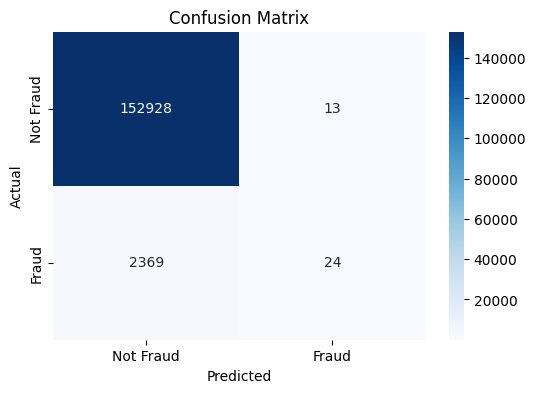

In [111]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Optionally, visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Question 4: Model

### Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

* ### Provide an estimate of performance using an appropriate sample, and show your work.

### **Answer:**

### 1. **Overview of the Report -**

* The **test set** has a total of **155,334** transactions. Among these, **152,941 transactions** are **non-fraudulent** (**labeled as 0**) and **2,393** are **fraudulent** (**labeled as 1**). This means only about **1.54%** of the transactions are **fraud**.

* The **classification report** tells us that for the **non-fraudulent class** the model is nearly perfect, whereas for the **fraudulent class**, it correctly identifies only about **1% of the cases**.

* The overall **accuracy** is **98%**, and the **ROC AUC** score is approximately **0.73**, which indicates a moderate ability of the model to rank transactions by risk.

### 2. **Estimating model's performance using an appropriate sample-**

To estimate the model's performance, I am considering a sample of 100,000 transactions drawn from the test set. Because the original distribution is maintained, we expect:**

* **Non-fraudulent transactions:**
152941/155334 X 100000 ≈ **98460**

* **Fraudulent transactions:**
2393/155334 X 100000 ≈ **1540**

### 3. **Performance for Fraud Detection-**

The classification report for fraud (class 1) gives us two key numbers:

* *Recall of about 1%:* This means that out of all **1,540 fraudulent transactions** in our sample, the model correctly identifies only about **0.01 X 1540 ≈ 15 transactions**.

* *Precision of about 65%:* This indicates that when the model flags a transaction as **fraudulent**, approximately **65%** of the time this is **correct**. Given the above recall, if the model only correctly identifies about 15 cases, it must be making roughly **15/0.65≈23 predictions of fraud**.

In other words, for every **23 transactions** predicted as **fraud**, only **15** are **true frauds** and the remaining **8** are **genuine transactions** mistakenly **flagged**.

### 4. **Performance for Non-Fraudulent Transactions-**

* Out of approximately **98,460 non-fraudulent** transactions, almost all are **correctly** identified.

* Even though the model **mistakenly** flags about **8 genuine transactions** (from our sample) as **fraud**, it **correctly** classifies around **98,452 transactions** as **non-fraudulent**.

### 5. **Overall Accuracy and Its Interpretation-**

* **Accuracy:** When we combine the correct predictions for both classes, we have: **`Correct non-fraud predictions + Correct fraud predictions ≈ 98452 + 15 = 98467`** Dividing this by the total number of transactions in our sample (**100,000**) gives an **accuracy** of approximately **98.5%**.

* **ROC AUC Score:** With a value of about **0.73**, the model shows a moderate ability to differentiate between fraudulent and non-fraudulent transactions when ranking them by risk. This means that if you randomly select one fraudulent and one non-fraudulent transaction, the model will correctly identify the riskier one about **73%** of the time.






### 6. **Reason for Usage of Confusion Matrix:**

* The model correctly identifies **152,928 legitimate transactions** as “**Not Fraud**” and incorrectly labels **13** of them as fraudulent (**false positives**). On the other hand, it misses **2,369 fraudulent transactions** (**false negatives**) while correctly detecting **24** as fraud (**true positives**). While metrics like accuracy or the ROC AUC score give a broad view of model performance, they can obscure how the model handles this minority “**Fraud**” class.

* In fraud detection, the cost of different types of errors is not equal. False negatives (missed frauds) can lead to financial losses and undermine the system's reliability, whereas false positives might inconvenience customers. By examining the confusion matrix, these errors can be quantified and assessed by providing further guidance to improve the model.

* The confusion matrix offers an intuitive and interpretable summary of the classifier's performance. Stakeholders often appreciate visual representations (such as the **heatmap** above) because they clearly summarize complex performance data, making it easier to communicate the model's strengths and weaknesses.





# Question 4: Model

### Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.

* ### Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)

### **Answer:**

### **Modeling Algorithm and Methodology:**

I employed a **Random Forest classifier** as my predictive model. Random Forests are ensemble methods that combine multiple decision trees to produce robust predictions. This algorithm was selected for several reasons:

* **Robustness to Overfitting:** By aggregating the results of numerous trees, Random Forests can manage noise and avoid overfitting, which is especially useful when dealing with high-dimensional data.

* **Handling Mixed Data Types:** Our dataset includes both numeric (e.g., transactionAmount, availableMoney) and categorical variables (e.g., merchantName, posEntryMode). Random Forests naturally handle such heterogeneous features once they have been appropriately preprocessed.

* **Interpretability and Feature Importance:** Random Forests provide measures of feature importance, which can help us understand which aspects of the transaction data are most predictive of fraud.

* **Parallelization:** The classifier was configured with `n_jobs=-1` to leverage all available cores, speeding up the training process on our large dataset.

I have constructed a comprehensive preprocessing pipeline using scikit-learn's `Pipeline` and `ColumnTransformer` facilities. The pipeline included:

* **Datetime Conversion and Feature Engineering:** Converting `transactionDateTime` and other date fields to datetime objects. Deriving temporal features such as the hour, day of the week, and month of the transaction. These features can capture patterns such as fraudulent activity occurring at unusual times.

* **Handling Boolean Data:** Converting boolean fields (cardPresent and expirationDateKeyInMatch) to integer format (0/1) for modeling.

* **Feature Selection:** I intentionally omitted high-cardinality identifiers like `accountNumber` and `customerId` to reduce the risk of overfitting. Instead, I selected features believed to capture meaningful behavioral, financial, and transactional characteristics (e.g., `creditLimit`, `transactionAmount`, and categorical variables such as `merchantName` and `transactionType`).

* **Scaling and Encoding:** Numeric features were standardized using `StandardScaler`. Categorical features were one-hot encoded using `OneHotEncoder` with `handle_unknown='ignore'` to robustly handle categories not seen during training.


**Data Splitting:** I have performed stratified splitting to ensure that the highly imbalanced fraud distribution (where fraud is the minority class) was preserved in both the training and testing sets.

### **Useful Features:**

* **Transaction Amount and Financial Metrics:** Variables such as `transactionAmount`, `availableMoney`, and `currentBalance` provide direct monetary context, which is crucial in distinguishing fraudulent transactions from normal behavior.

* **Temporal Features:** Features derived from transactionDateTime (hour, day of week, month) are especially useful because fraudulent transactions may exhibit distinct time-of-day or day-of-week patterns compared to legitimate transactions.

* **Categorical Variables:** Merchant-related fields (`merchantName`, `merchantCategoryCode`, `transactionType`) and payment entry modes (e.g., `posEntryMode`, `posConditionCode`) are significant as they capture the context in which transactions occur. Certain merchants or transaction types may be more susceptible to fraud.

### **Key Questions:**
* **Why is Fraud Recall So Low?** Despite a reasonable ROC AUC, the extremely low recall for fraud indicates that the model's decision threshold (typically 0.5) might be too conservative. Would adjusting the threshold or employing cost-sensitive learning improve detection?

* **Feature Enhancement:** Are there additional features such as behavioral aggregates, account-level patterns, or external data—that could better capture fraudulent behavior? For example, could transaction velocity or geographic inconsistencies offer more signal?





### **Future Work with More Time:**

* **Threshold Adjustment & Cost-Sensitive Learning:** Fine-tune the classification threshold and potentially incorporate cost-sensitive learning or class weights to better balance the precision-recall trade-off for the fraud class.

* **Resampling Techniques:** Experiment with oversampling the minority class (using methods like SMOTE) or undersampling the majority class to reduce imbalance and improve the model's sensitivity to fraud.

* **Advanced Feature Engineering:** Explore aggregation features at the account or merchant level. Incorporate historical behavior patterns and trends over time.

* **Model Tuning and Comparison:** Perform hyperparameter tuning and compare the Random Forest with other algorithms such as boosting methods (e.g., XGBoost, LightGBM) to see if these can capture the minority class more effectively.

* **Additional Validation:** Validate the model using cross-validation and potentially test on a more recent dataset to ensure robustness and generalizability.

# References for the following libraries used in this project:

1. json: https://docs.python.org/3/library/json.html
2. pandas: https://pandas.pydata.org/docs/#module-pandas
3. requests: https://realpython.com/python-requests/
4. zipfile: https://docs.python.org/3/library/zipfile.html
5. io: https://docs.python.org/3/library/io.html
6. os: https://docs.python.org/3/library/os.html
7. matplotlib: https://matplotlib.org/stable/gallery/index.html
8. numpy: https://numpy.org/doc/2.2/user/index.html
9. scikit-learn: https://scikit-learn.org/dev/modules/ensemble.html#forest
10. seaborn: https://seaborn.pydata.org/tutorial.html

# References for the following code used in this project:

1. To read a zipped file from Github as a pandas dataframe : https://stackoverflow.com/questions/18885175/read-a-zipped-file-as-a-pandas-dataframe
2. To calculate basic summary statistics of each field in the dataset: https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
3. To plot a histogram of the transaction amount column: https://mode.com/example-gallery/python_histogram#data-wrangling
4. To find out merchants who might be contributing to the skewed distribution of the histogram: https://github.com/uroy98/DataScience_Projects ( **This is a repository of my previously done data science projects!** )
5. To find out reversal transactions : https://stackoverflow.com/questions/42432724/find-the-reversal-transactions-in-my-table
6. To find out multi-swipe transactions: https://stackoverflow.com/questions/56517004/mark-duplicates-based-on-time-difference-between-successive-rows
7. To build a predictive model to determine whether a given transaction will be fraudulent or not: https://github.com/uroy98/DataScience_Projects/blob/main/AdvancedMachineLearning_Project2.ipynb ( **This is a repository of my previously done data science projects!** )
8. To plot the confusion matrix: https://github.com/uroy98/DataScience_Projects/blob/main/AdvancedMachineLearning_Project2.ipynb ( **This is a repository of my previously done data science projects!** )